In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [95]:
df = pd.read_excel('insurance.xlsx')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Label Encoding 

In [96]:
le = LabelEncoder()

In [97]:
for col in df.columns:
    if df[col].dtype == np.number:
        continue
    else:
        df[col] = le.fit_transform(df[col])

In [98]:
df

,age,sex,bmi,children,smoker,region,charges
0,1,0,27.900,0,1,3,16884.92400
1,0,1,33.770,1,0,2,1725.55230
2,10,1,33.000,3,0,2,4449.46200
3,15,1,22.705,0,0,1,21984.47061
4,14,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,32,1,30.970,3,0,1,10600.54830
1334,0,0,31.920,0,0,0,2205.98080
1335,0,0,36.850,0,0,2,1629.83350
1336,3,0,25.800,0,0,3,2007.94500


In [99]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,21.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,0.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,9.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,21.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,33.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,46.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [100]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,21.207025,14.049960,0.0000,9.00000,21.000,33.000000,46.00000
sex,1338.0,0.505232,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
smoker,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000
region,1338.0,1.515695,1.104885,0.0000,1.00000,2.000,2.000000,3.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [101]:
x = df.drop('charges',axis=1)
y =df['charges']

In [102]:
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest= tts(x,y,test_size=0.3,random_state=7)

In [103]:
xtrain

,age,sex,bmi,children,smoker,region
934,14,1,37.180,2,0,2
530,39,1,42.130,1,1,2
518,17,0,31.000,1,0,3
619,37,0,37.100,0,0,3
691,29,1,36.200,1,0,3
...,...,...,...,...,...,...
211,22,1,30.875,4,0,1
502,33,1,23.210,1,1,2
537,28,0,30.200,2,0,3
1220,12,0,21.945,1,0,0


In [104]:
xtest

,age,sex,bmi,children,smoker,region
13,38,0,39.820,0,0,2
1052,31,1,29.830,1,0,0
172,0,1,15.960,0,0,0
1085,21,0,18.300,5,1,3
683,35,1,24.320,0,0,1
...,...,...,...,...,...,...
968,3,1,25.745,2,0,0
1145,34,1,32.775,3,0,1
4,14,1,28.880,0,0,1
697,23,1,35.750,1,1,2


In [105]:
ytrain

934      4673.39220
530     48675.51770
518      5240.76500
619     10713.64400
691      8068.18500
           ...     
211      8162.71625
502     22218.11490
537      8825.08600
1220     4718.20355
175     48824.45000
Name: charges, Length: 936, dtype: float64

In [106]:
ytest

13      11090.71780
1052     9288.02670
172      1694.79640
1085    19023.26000
683      9863.47180
           ...     
968      3279.86855
1145    11289.10925
4        3866.85520
697     40273.64550
715     12146.97100
Name: charges, Length: 402, dtype: float64

# Linear Regression

In [107]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(xtrain,ytrain)

LinearRegression()

In [108]:
reg_pred = reg.predict(xtest)
reg_pred

array([15394.00014089, 11046.51018434, -2294.70847587, 28810.71124866,
        9222.4819142 ,  2801.96083471, 26487.78331366,  3444.56538421,
        4067.3689799 , 10579.64796023,  7609.74107988, 10127.26374852,
        1833.70780342,  3694.12194648, 13647.86513227, 13172.46872099,
        5641.75918857, 17593.64050869,  8556.93271712,  9521.16880463,
        7571.31510424,  1631.74741576, 30610.5279269 , 31517.01674722,
       28373.97036408, 31979.48775158, 37243.26421097, 30892.18612101,
        9847.17684568, 10316.94843795, 12156.40584304, 32444.68990734,
        7163.49850795, 14702.58979498,  9995.61999425,  3634.72010181,
        4365.90320492,  8792.78088304, 12159.51783321,  -303.55546152,
        5567.95884449,  5825.78873312,  7947.64398038,  9835.5940029 ,
        7985.10075691,  2734.66628577,  6182.90733966, 35852.62360943,
       31705.5771951 , 15319.13416741,  7292.71398844, 29346.26315431,
       11122.6379183 ,  9992.52250538,  4708.96420702, 33484.85275132,
      

In [109]:
reg_accuracy =reg.score(xtest,ytest)
reg_accuracy 

0.7515903429011491

In [110]:
reg_m = reg.coef_
reg_m

array([  253.42835136,  -173.10291884,   362.87565282,   451.85446352,
       23661.24717692,  -386.44236498])

In [111]:
reg_c = reg.intercept_
reg_c

-7913.100976079575

In [112]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
reg_mae = mean_absolute_error(ytest,reg_pred)
reg_mae

4243.592835807945

In [113]:
reg_mse = mean_squared_error(ytest,reg_pred)
reg_mse

36326286.18199139

# KNN Classification

In [114]:
df

,age,sex,bmi,children,smoker,region,charges
0,1,0,27.900,0,1,3,16884.92400
1,0,1,33.770,1,0,2,1725.55230
2,10,1,33.000,3,0,2,4449.46200
3,15,1,22.705,0,0,1,21984.47061
4,14,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,32,1,30.970,3,0,1,10600.54830
1334,0,0,31.920,0,0,0,2205.98080
1335,0,0,36.850,0,0,2,1629.83350
1336,3,0,25.800,0,0,3,2007.94500


In [115]:
x = df.drop('charges',axis=1)
y =df['charges']

In [116]:
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest= tts(x,y,test_size=0.3,random_state=5)

In [117]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(xtrain,ytrain)

KNeighborsRegressor(n_neighbors=1)

In [118]:
knn_pred = knn.predict(xtest)
knn_pred 

array([21344.8467 , 34254.05335, 11082.5772 , 35585.576  ,  5246.047  ,
       42983.4585 ,  8556.907  , 11085.5868 , 17878.90068,  9487.6442 ,
       48824.45   , 12044.342  ,  1633.9618 ,  7789.635  , 21677.28345,
        5934.3798 ,  8017.06115, 26392.26029, 11299.343  ,  6067.12675,
       36021.0112 ,  2221.56445,  1639.5631 ,  2866.091  ,  2974.126  ,
        5836.5204 , 10594.2257 , 14418.2804 , 14449.8544 , 13462.52   ,
       28476.73499,  1632.56445, 26018.95052, 40974.1649 , 21978.6769 ,
       36307.7983 ,  4779.6023 , 16586.49771,  3577.999  , 18903.49141,
        1137.011  , 14256.1928 , 44585.45587,  5469.0066 ,  9617.66245,
        7325.0482 ,  9290.1395 , 18033.9679 , 11411.685  ,  2138.0707 ,
        2927.0647 , 19719.6947 ,  5209.57885,  2473.3341 ,  2457.502  ,
        5976.8311 , 10564.8845 ,  3044.2133 ,  7731.4271 ,  7727.2532 ,
       25333.33284,  5209.57885, 18806.14547,  1135.9407 ,  6282.235  ,
        2789.0574 ,  1737.376  , 12333.828  , 11674.13   ,  7162

In [119]:
knn_accuracy =knn.score(xtest,ytest)
knn_accuracy 

-0.30232404174666905

In [120]:
knn_mae = mean_absolute_error(ytest,knn_pred)
knn_mae

7628.072571917911

In [121]:
knn_mse = mean_squared_error(ytest,knn_pred)
knn_mse

185175678.29034162

In [126]:
data = {'Model': ['KNN','Linear Regression'],
        'MAE':[knn_mae,reg_mae],
        'MSE':[knn_mse,reg_mse],
       'Accuracy':[knn_accuracy,reg_accuracy]}
df1 = pd.DataFrame(data)
df1

,Model,MAE,MSE,Accuracy
0,KNN,7628.072572,1.851757e+08,-0.302324
1,Linear Regression,4243.592836,3.632629e+07,0.751590


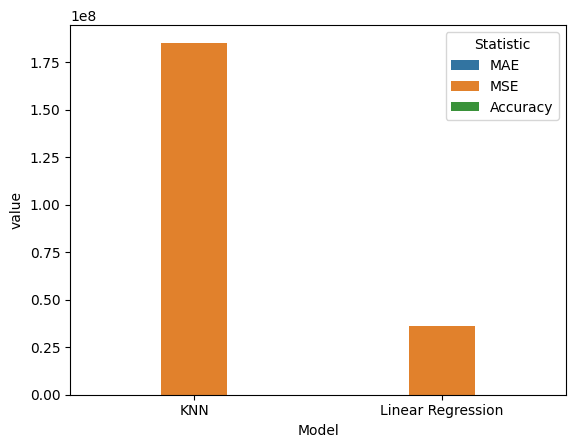

In [127]:
df2 = pd.melt(frame = df1,id_vars ='Model',var_name = 'Statistic',value_name = 'value')
sns.barplot(data=df2,x='Model',y='value',hue = 'Statistic')
plt.show()